# Portuguese Banking Institution - Term Deposit Subscription Analysis

# Data Description:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Domain:
Banking

# Context:
Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

# Attribute Information:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
9. contact: contact communication type (categorical: 'cellular','telephone')
10. day: last contact day of the month (numeric 1 -31)
11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
17. target: has the client subscribed a term deposit? (binary: "yes","no")

# Learning Outcomes:
     
    Exploratory Data Analysis
    Preparing the data to train a model
    Training and making predictions using an Ensemble Model
    Tuning an Ensemble model

# Objective:
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# Steps and tasks:
1. Import the necessary libraries (2.5 marks)
2. Read the data as a data frame (2.5 marks)
3. Perform basic EDA which should include the following and print out your insights at every step. (15 marks).    
    a. Shape of the data (2 marks)    
    b. Data type of each attribute (2 marks)    
    c. Checking the presence of missing values (4 marks)    
    d. 5 Point summary of numerical attributes (3 marks)    
    e. Checking the presence of outliers (4 marks)
    
4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc. (15 marks)
5. Train a few standard classification algorithms, note and comment on their performances across different classification metrics. (15 marks)
6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees. (15 marks)
7. Compare performances of all the models (5 marks)

# References:
    Data analytics use cases in Banking - https://activewizards.com/blog/top-9-data-science-use-cases-in-banking/
    Machine Learning for Financial Marketing - https://thefinancialbrand.com/71350/ai-machine-learning-analytics-marketing-banking-trends/

# **1. Import the necessary libraries (2.5 marks)**

In [1]:
# importing standard libraries
import numpy as np              # for mathematical linear Algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
import seaborn as sns           # for data visualization
import scipy.stats as stats     # some useful stuff
import warnings                 # to ignore any warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import metrics     # calculate accuracy measures and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error # to check accuracy of model
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  # Library for data split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


# **2. Read the data as a data frame (2.5 marks)**

In [2]:
# Reading the data
# csv file needs to be in the google drive if using colab
# csv file needs to be in the same location as ipynb if using notebook
df = pd.read_csv("bank-full.csv")
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [3]:
df_cp=df.copy() #  Copy of the dataset

In [4]:
df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no

# **3. Perform basic EDA which should include the following and print out your insights at every step. (15 marks)**

**a. Shape of the data (2 marks)**

In [5]:
# Description of the variable and data shape
print(df.columns)
print(df.shape)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')
(45211, 17)


There are 45211 rows and 16 independent variables and 1 Dependent variable

**b. Data type of each attribute (2 marks)**

In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

10 variables are object type and 7 variables are the Numerical

**c. Checking the presence of missing values (4 marks)**

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
df.notnull()

age   job  marital  education  default  balance  housing  loan  \
0      True  True     True       True     True     True     True  True   
1      True  True     True       True     True     True     True  True   
2      True  True     True       True     True     True     True  True   
3      True  True     True       True     True     True     True  True   
4      True  True     True       True     True     True     True  True   
...     ...   ...      ...        ...      ...      ...      ...   ...   
45206  True  True     True       True     True     True     True  True   
45207  True  True     True       True     True     True     True  True   
45208  True  True     True       True     True     True     True  True   
45209  True  True     True       True     True     True     True  True   
45210  True  True     True       True     True     True     True  True   

       contact   day  month  duration  campaign  pdays  previous  poutcome  \
0         True  True   True      True      True   True      True      True   
1         True  True   True      True      True   True      True      True   
2         True  True   True      True      True   True      True      True   
3         True  True   True      True      True   True      True      True   
4         True  True   True      True      True   True      True      True   
...        ...   ...    ...       ...       ...    ...       ...       ...   
45206     True  True   True      True      True   True      True      True   
45207     True  True   True      True      True   True      True      True   
45208     True  True   True      True      True   True      True      True   
45209     True  True   True      True      True   True      True      True   
45210     True  True   True      True      True   True      True      True   

       Target  
0        True  
1        True  
2        True  
3        True  
4        True  
...       ...  
45206    True  
45207    True  
45208    True  
45209    True  
45210    True  

[45211 rows x 17 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


No nan or null in any column in the data set, 0 missing cells

**d. 5 Point summary of numerical attributes (3 marks)**

In [10]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

Describe option shows only for the numerical variables and not for objects

**e. Checking the presence of outliers (4 marks)**

In [11]:
!pip install pandas_profiling
import pandas_profiling

In [12]:
df.profile_report()

# **4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc. (15 marks)**

#12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [13]:
df.drop(['duration'], inplace=True, axis=1)

Certain categorical variables are more relevant than numerical variables. We have to convert such categorical variables to numeric variabes

In [14]:
#df['pdays']=df['pdays'].astype('category')
df['Target']=df['Target'].astype('category')
#Rename the dependant column from 'Target ' to 'y'
#bank_df.rename(columns={'Target':'y'}, inplace=True)

In [15]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  campaign  pdays  previous poutcome Target  
0  unknown    5   may         1     -1         0  unknown     no  
1  unknown    5   may         1     -1         0  unknown     no  
2  unknown    5   may         1     -1         0  unknown     no  
3  unknown    5   may         1     -1         0  unknown     no  
4  unknown    5   may         1     -1         0  unknown     no

# Exploratory data analysis

# Multivariate analysis - boxplot / histogram for numerical variables¶

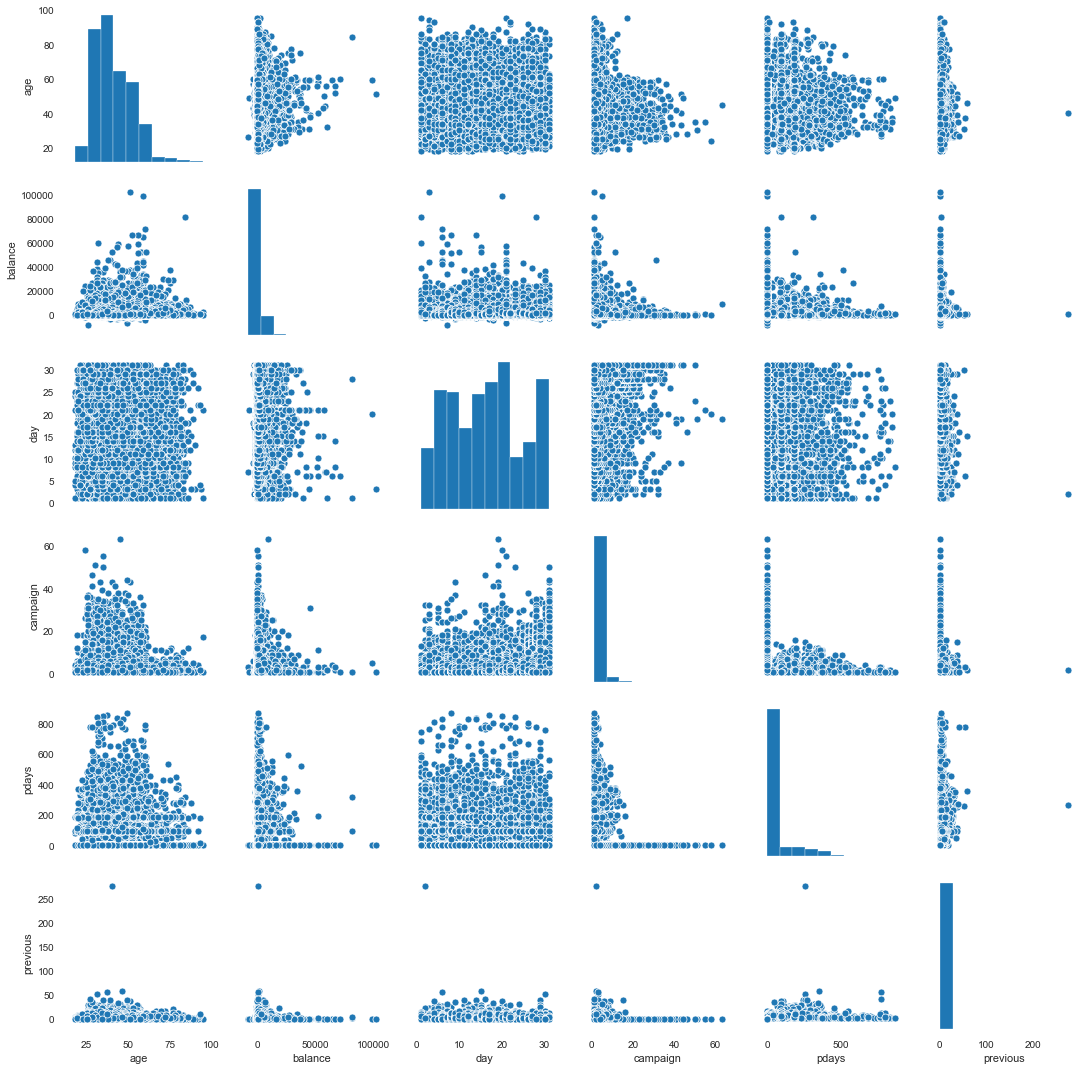

In [16]:
#histograms from the pair plots
sns.pairplot(df);

The distribution of all numerical variables other than age is highly skewed - hence we might want to transform or bin some of these variables

# Univariate analysis - boxplot / histogram for numerical variables

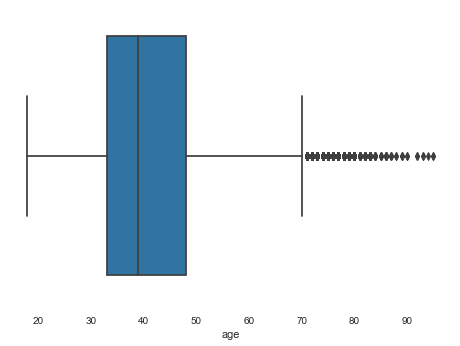

In [17]:
sns.boxplot(x=df['age'], data=df);

Age column has some outliers. The median age is about 40 years. There are some customers above 90 years of age. This data needs to be checked

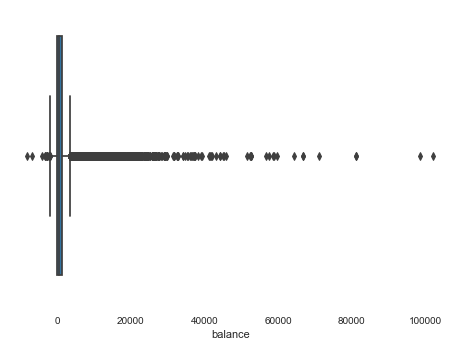

In [18]:
sns.boxplot(x=df['balance'], data=df);

Balance column data is highly skewed, this can be ignored

In [19]:
#df.drop(['balance'], inplace=True, axis=1)

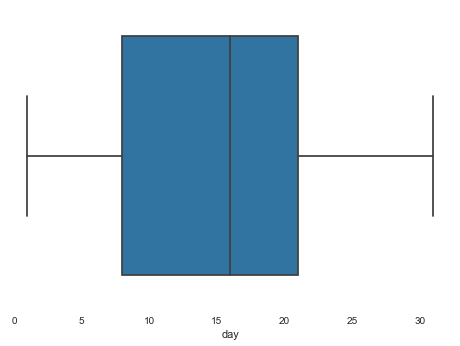

In [20]:
sns.boxplot(x=df['day'], data=df);

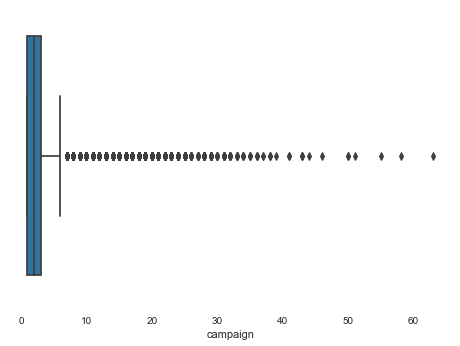

In [21]:
sns.boxplot(x=df['campaign'], data=df);

Campaign column data has lot of outliers, which needs to be converted to bins.

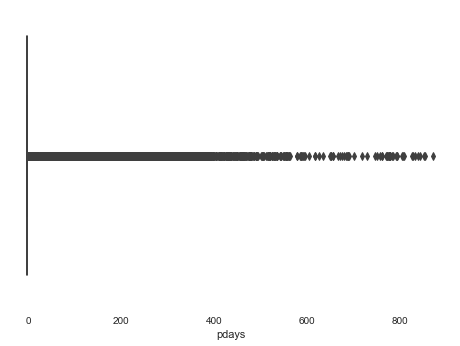

In [22]:
sns.boxplot(x=df['pdays'], data=df);

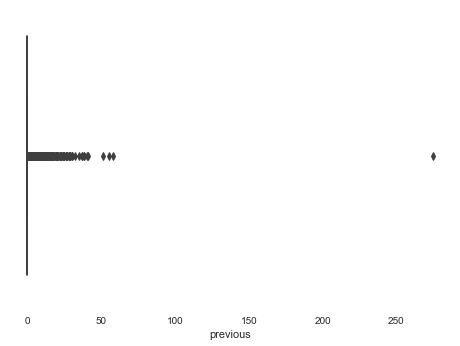

In [23]:
# Univariate analysis of other Numerical variables
sns.boxplot(x=df['previous'], data=df);

# Univariate analysis - countplot / value count for categorical variables

In [24]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

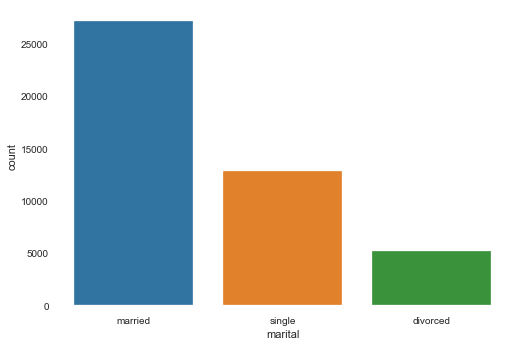

In [25]:
sns.countplot(df['marital']);

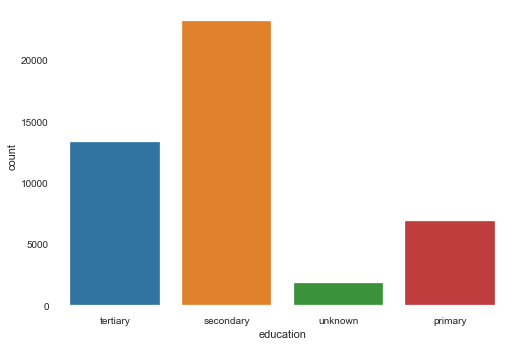

In [26]:
sns.countplot(df['education']);

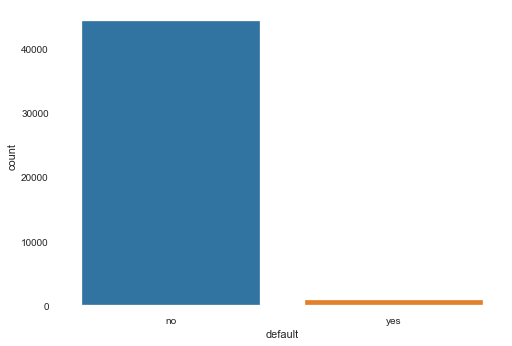

In [27]:
sns.countplot(df['default']);

default " yes " is small in percentage  - we can consider deleting this column

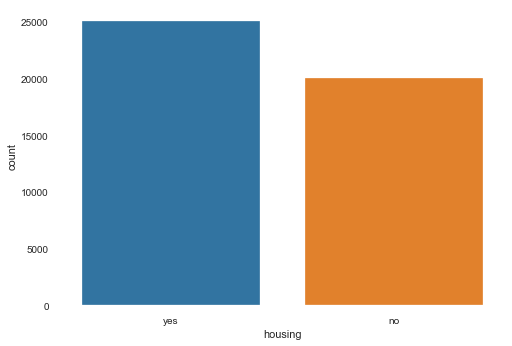

In [28]:
sns.countplot(df['housing']);

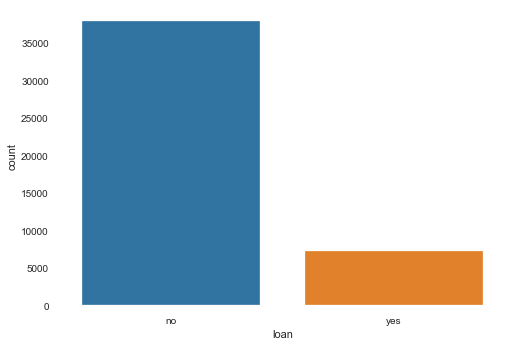

In [29]:
sns.countplot(df['loan']);

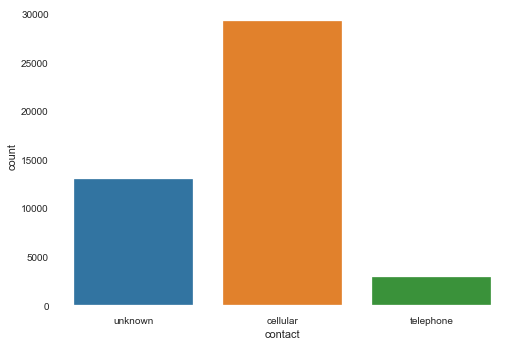

In [30]:
sns.countplot(df['contact']);

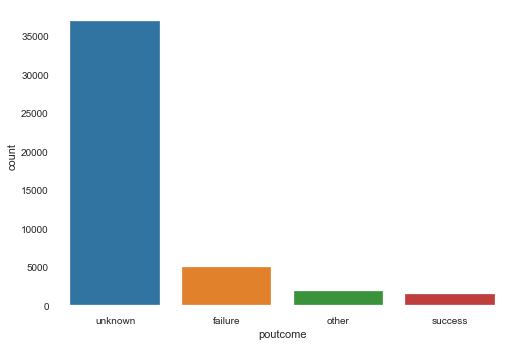

In [31]:
sns.countplot(df['poutcome']);

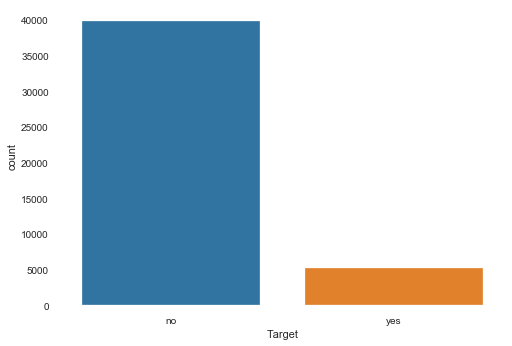

In [32]:
sns.countplot(df['Target']);

Term Deposit subcription - " yes " is small in percentage

In [33]:
df['Target'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

The response rate is only 11.6%. 
Hence the Y variable has a high class imbalance where the total number of positive class is far less than the total number of another class negative. Hence accuracy will not be a reliable model performance measure.
False Negatve (FN) is very critical for this business case because it is a customer who will potentially subscribe for a loan but who has been classified as 'will not subscribe'. Hence the most relevant model performance measure is Recall.

# Bivariate analysis

In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'Target'],
      dtype='object')

In [35]:
#Group numerical variables by mean for the classes of Target variable
np.round(df.groupby(["Target"]).mean() ,1)

age  balance   day  campaign  pdays  previous
Target                                                
no      40.8   1303.7  15.9       2.8   36.4       0.5
yes     41.7   1804.3  15.2       2.1   68.7       1.2

The mean balance is higher for customers who subscribe to the term deposit compared to those who dont

Number of days that passed by after the client was last contacted from a previous campaign is higher for people who have subscribed 

Number of contacts performed before this campaign is also higher for customers who subscribe.

All of the above facts indicate that customers with a higher balance and those who have been contacted frequently before the campaign tend to subscribe for the term deposit

**Bivariate analysis using crosstab**

In [36]:
pd.crosstab(df['job'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target               no       yes
job                              
student        0.713220  0.286780
retired        0.772085  0.227915
unemployed     0.844973  0.155027
management     0.862444  0.137556
admin.         0.877973  0.122027
self-employed  0.881571  0.118429
unknown        0.881944  0.118056
technician     0.889430  0.110570
services       0.911170  0.088830
housemaid      0.912097  0.087903
entrepreneur   0.917283  0.082717
blue-collar    0.927250  0.072750

The highest subscription is for students (29%) and lowest is for blue-collar(7%)

In [37]:
pd.crosstab(df['marital'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target          no       yes
marital                     
single    0.850508  0.149492
divorced  0.880545  0.119455
married   0.898765  0.101235

The highest subscription is for single (14%) and lowest is for married(10%)

In [38]:
pd.crosstab(df['education'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target           no       yes
education                    
tertiary   0.849936  0.150064
unknown    0.864297  0.135703
secondary  0.894406  0.105594
primary    0.913735  0.086265

In [39]:
print(pd.crosstab(df['default'], df['Target'], normalize='index').sort_values(by='yes',ascending=False ))
print(df['default'].value_counts(normalize=True))

Target         no       yes
default                    
no       0.882039  0.117961
yes      0.936196  0.063804
no     0.981973
yes    0.018027
Name: default, dtype: float64


Since default - yes is only 1.8% of the data and the conversion is also comparitively lower for default - yes, we can remove this column

In [40]:
df.drop(['default'], axis=1, inplace=True)

In [41]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome',
       'Target'],
      dtype='object')

In [42]:
pd.crosstab(df['housing'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target         no       yes
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000

The highest subscribers have no home loan (17%) and lowest is for married(8%)

In [43]:
pd.crosstab(df['loan'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target        no       yes
loan                      
no      0.873443  0.126557
yes     0.933186  0.066814

The highest subscribers have no Personal loan (13%) and lowest is for married(7%)

In [44]:
pd.crosstab(df['contact'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target           no       yes
contact                      
cellular   0.850811  0.149189
telephone  0.865795  0.134205
unknown    0.959293  0.040707

The highest subscribers have Cellular contact (15%) and lowest is unknown(4%)

In [45]:
pd.crosstab(df['day'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target        no       yes
day                       
1       0.720497  0.279503
10      0.769084  0.230916
30      0.826948  0.173052
22      0.829834  0.170166
3       0.835032  0.164968
4       0.840830  0.159170
25      0.841667  0.158333
12      0.847785  0.152215
13      0.847950  0.152050
2       0.859242  0.140758
15      0.860247  0.139753
24      0.861298  0.138702
16      0.864311  0.135689
23      0.865815  0.134185
27      0.866191  0.133809
11      0.877620  0.122380
9       0.885330  0.114670
14      0.886364  0.113636
5       0.887435  0.112565
26      0.887923  0.112077
8       0.890879  0.109121
21      0.900790  0.099210
18      0.901213  0.098787
6       0.906315  0.093685
17      0.909232  0.090768
7       0.913594  0.086406
28      0.921858  0.078142
29      0.926074  0.073926
31      0.928460  0.071540
20      0.930233  0.069767
19      0.930563  0.069437

The highest subscribers have last contact on 1st day of the month (28%) and lowest is on 19th (7%)

In [46]:
pd.crosstab(df['month'], df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target        no       yes
month                     
mar     0.480084  0.519916
dec     0.532710  0.467290
sep     0.535406  0.464594
oct     0.562331  0.437669
apr     0.803206  0.196794
feb     0.833522  0.166478
aug     0.889867  0.110133
jun     0.897772  0.102228
nov     0.898489  0.101511
jan     0.898788  0.101212
jul     0.909065  0.090935
may     0.932805  0.067195

The highest subscribers have last contact in March month (52%) and lowest in May (7%)

In [47]:
df2=df_cp.copy()

Adding a new column named 'conv' converted with Target values like if yes, then converted column gets 1 or else, it is 0.

In [48]:
df2['conv']= df2['Target'].apply(lambda x: 1 if x == 'yes' else 0)
#total_conv_rate_df2 = pd.DataFrame(df.groupby('conv').count()['Target'] / df2.shape[0] * 100.0)
group_by_age= df2.groupby(by='age')['conv'].sum()
total_count= df2.groupby(by='age')['conv'].count()
total_conv_by_age =(group_by_age/total_count)*100
total_conv_by_age.head(10)

age
18    58.333333
19    31.428571
20    30.000000
21    27.848101
22    31.007752
23    21.782178
24    22.516556
25    21.442125
26    16.645963
27    15.511551
Name: conv, dtype: float64

Finding what percentage of so and so age people took subscription subscription

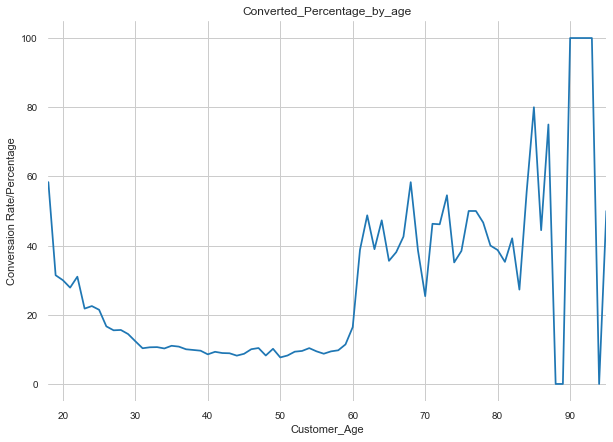

In [49]:
age_graph = total_conv_by_age.plot(grid=True, figsize=(10,7),title='Converted_Percentage_by_age')
age_graph.set_xlabel('Customer_Age')
age_graph.set_ylabel('Conversaion Rate/Percentage')
plt.show()

Finding by age groups and marital status

In [50]:
df2['sep_of_age_grp']=df2['age'].apply(lambda x: '[18,30)' if x < 30 \
                                       else '[30,40)' if x < 40 \
                                       else '[40,50)' if x< 50 \
                                       else '[50,60)' if x< 60 \
                                       else '[60,70)' if x< 70  else '70+'
                                      )
sum_of_sep_age_grps = df2.groupby(by='sep_of_age_grp')['conv'].sum()
total_count= df2.groupby(by='sep_of_age_grp')['conv'].count()
sep_by_age_grp = (sum_of_sep_age_grps/total_count)*100
age_marital= df2.groupby(['sep_of_age_grp','marital'])['conv'].sum().unstack('marital').fillna(0)
age_marital = age_marital.divide(df2.groupby(by='sep_of_age_grp')['conv'].count(),axis=0)
age_marital

marital         divorced   married    single
sep_of_age_grp                              
70+             0.099278  0.319495  0.005415
[18,30)         0.002086  0.023326  0.150578
[30,40)         0.008735  0.050473  0.046548
[40,50)         0.015015  0.058172  0.018018
[50,60)         0.019025  0.068014  0.006302
[60,70)         0.051220  0.237398  0.008130

Cleaning the dataset by removing columns which are not useful for us.

In [51]:
df2.drop(['education','default','balance','day','campaign','pdays','previous','poutcome','conv','sep_of_age_grp'],axis=1,inplace=True)
df2.dtypes

age          int64
job         object
marital     object
housing     object
loan        object
contact     object
month       object
duration     int64
Target      object
dtype: object

In [52]:
df2.loc[:,['marital', 'job', 'housing', 'loan', 'contact', 'month', 'Target']] \
= df2.loc[:,['marital', 'job', 'housing', 'loan', 'contact', 'month', 'Target']].apply(LabelEncoder().fit_transform)
df2.head(11)

age  job  marital  housing  loan  contact  month  duration  Target
0    58    4        1        1     0        2      8       261       0
1    44    9        2        1     0        2      8       151       0
2    33    2        1        1     1        2      8        76       0
3    47    1        1        1     0        2      8        92       0
4    33   11        2        0     0        2      8       198       0
5    35    4        1        1     0        2      8       139       0
6    28    4        2        1     1        2      8       217       0
7    42    2        0        1     0        2      8       380       0
8    58    5        1        1     0        2      8        50       0
9    43    9        2        1     0        2      8        55       0
10   41    0        0        1     0        2      8       222       0

Adding another column named dur to make duration above 360 is 1, else 0 and deleting the duration.

In [53]:
df2['dur']=df2['duration'].apply(lambda x: 0 if x < 360 else 1)
df2.drop(['duration'], axis =1, inplace = True)
df2.head(10)

age  job  marital  housing  loan  contact  month  Target  dur
0   58    4        1        1     0        2      8       0    0
1   44    9        2        1     0        2      8       0    0
2   33    2        1        1     1        2      8       0    0
3   47    1        1        1     0        2      8       0    0
4   33   11        2        0     0        2      8       0    0
5   35    4        1        1     0        2      8       0    0
6   28    4        2        1     1        2      8       0    0
7   42    2        0        1     0        2      8       0    1
8   58    5        1        1     0        2      8       0    0
9   43    9        2        1     0        2      8       0    0

Converting categorical to Dummies

In [54]:
cat_cols = ['job','marital','housing','loan','contact','month','Target','dur']
df2 = pd.get_dummies(df2, columns = cat_cols, drop_first = True,)
df2.head(10)

age  job_1  job_2  job_3  job_4  job_5  job_6  job_7  job_8  job_9  ...  \
0   58      0      0      0      1      0      0      0      0      0  ...   
1   44      0      0      0      0      0      0      0      0      1  ...   
2   33      0      1      0      0      0      0      0      0      0  ...   
3   47      1      0      0      0      0      0      0      0      0  ...   
4   33      0      0      0      0      0      0      0      0      0  ...   
5   35      0      0      0      1      0      0      0      0      0  ...   
6   28      0      0      0      1      0      0      0      0      0  ...   
7   42      0      1      0      0      0      0      0      0      0  ...   
8   58      0      0      0      0      1      0      0      0      0  ...   
9   43      0      0      0      0      0      0      0      0      1  ...   

   month_4  month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
0        0        0        0        0        1        0         0         0   
1        0        0        0        0        1        0         0         0   
2        0        0        0        0        1        0         0         0   
3        0        0        0        0        1        0         0         0   
4        0        0        0        0        1        0         0         0   
5        0        0        0        0        1        0         0         0   
6        0        0        0        0        1        0         0         0   
7        0        0        0        0        1        0         0         0   
8        0        0        0        0        1        0         0         0   
9        0        0        0        0        1        0         0         0   

   Target_1  dur_1  
0         0      0  
1         0      0  
2         0      0  
3         0      0  
4         0      0  
5         0      0  
6         0      0  
7         0      1  
8         0      0  
9         0      0  

[10 rows x 31 columns]

Dividing Testing and Training Dataset from the dataset (20:80)

In [55]:
X = df2.copy().drop('Target_1', axis=1)
y = df2['Target_1']

In [56]:
test_size = 0.20
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [57]:
X_train.shape,X_test.shape

((36168, 30), (9043, 30))

In [58]:
y_train.shape,y_test.shape

((36168,), (9043,))

Scaling numeric features

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 22468 to 33003
Data columns (total 30 columns):
age          36168 non-null int64
job_1        36168 non-null uint8
job_2        36168 non-null uint8
job_3        36168 non-null uint8
job_4        36168 non-null uint8
job_5        36168 non-null uint8
job_6        36168 non-null uint8
job_7        36168 non-null uint8
job_8        36168 non-null uint8
job_9        36168 non-null uint8
job_10       36168 non-null uint8
job_11       36168 non-null uint8
marital_1    36168 non-null uint8
marital_2    36168 non-null uint8
housing_1    36168 non-null uint8
loan_1       36168 non-null uint8
contact_1    36168 non-null uint8
contact_2    36168 non-null uint8
month_1      36168 non-null uint8
month_2      36168 non-null uint8
month_3      36168 non-null uint8
month_4      36168 non-null uint8
month_5      36168 non-null uint8
month_6      36168 non-null uint8
month_7      36168 non-null uint8
month_8      36168 non-null uint8
mon

In [60]:
scaler= StandardScaler()
scaler.fit(X_train.iloc[:,:5])
X_train.iloc[:,:5]=scaler.transform(X_train.iloc[:,:5])
X_test.iloc[:,:5]=scaler.transform(X_test.iloc[:,:5])

# 5. Train a few standard classification algorithms, note and comment on their performances across different classification metrics. (15 marks)

Store the accuracy results for each model in a dataframe for final comparison

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
X= X_train
y= y_train
model = LogisticRegression()
model.fit(X,y)
print('Train Accuracy:', accuracy_score(y,model.predict(X)))
model.fit(X_test, y_test)
print('Test Accuracy:',accuracy_score(y_test,model.predict(X_test)))

Train Accuracy: 0.8877737226277372
Test Accuracy: 0.8897489771093664


In [62]:
AccuracyDf = pd.DataFrame({'Method':['Logistic Regression'],
                           'Train_accuracy': accuracy_score(y,model.predict(X)),
                           'Test_accuracy': accuracy_score(y_test,model.predict(X_test))}
                         )
AccuracyDf = AccuracyDf[['Method', 'Train_accuracy','Test_accuracy']]
AccuracyDf

Method  Train_accuracy  Test_accuracy
0  Logistic Regression        0.886447       0.889749

# Naive Bayes

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)
print('Train Accuracy:', accuracy_score(y,model.predict(X)))
model.fit(X_test, y_test)
print('Test Accuracy:',accuracy_score(y_test,model.predict(X_test)))

In [63]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)
print('Train Accuracy:', accuracy_score(y,model.predict(X)))
model.fit(X_test, y_test)
print('Test Accuracy:',accuracy_score(y_test,model.predict(X_test)))

Train Accuracy: 0.8579407210794072
Test Accuracy: 0.8514873382726971


In [64]:
tempAccuracyDf = pd.DataFrame({'Method':['Naive Bayes'],
                           'Train_accuracy': accuracy_score(y,model.predict(X)),
                           'Test_accuracy': accuracy_score(y_test,model.predict(X_test))}
                             )
AccuracyDf = pd.concat([AccuracyDf,tempAccuracyDf])
AccuracyDf = AccuracyDf[['Method', 'Train_accuracy','Test_accuracy']]
AccuracyDf

Method  Train_accuracy  Test_accuracy
0  Logistic Regression        0.886447       0.889749
0          Naive Bayes        0.853462       0.851487

# KNN Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X,y)
print('Train Accuracy:', accuracy_score(y,model.predict(X)))
model.fit(X_test, y_test)
print('Test Accuracy:',accuracy_score(y_test,model.predict(X_test)))

Train Accuracy: 0.9207310329573103
Test Accuracy: 0.9198274908769214


In [66]:
tempAccuracyDf = pd.DataFrame({'Method':['KNN Classifier'],
                           'Train_accuracy': accuracy_score(y,model.predict(X)),
                           'Test_accuracy': accuracy_score(y_test,model.predict(X_test))}
                             )
AccuracyDf = pd.concat([AccuracyDf,tempAccuracyDf])
AccuracyDf = AccuracyDf[['Method', 'Train_accuracy','Test_accuracy']]
AccuracyDf

Method  Train_accuracy  Test_accuracy
0  Logistic Regression        0.886447       0.889749
0          Naive Bayes        0.853462       0.851487
0       KNN Classifier        0.870217       0.919827

# SVM

In [67]:
from sklearn.svm import SVC
model = SVC()
model.fit(X,y)
print('Train Accuracy:', accuracy_score(y,model.predict(X)))
model.fit(X_test, y_test)
print('Test Accuracy:',accuracy_score(y_test,model.predict(X_test)))

Train Accuracy: 0.883847600088476
Test Accuracy: 0.8838880902355413


In [68]:
tempAccuracyDf = pd.DataFrame({'Method':['SVM'],
                           'Train_accuracy': accuracy_score(y,model.predict(X)),
                           'Test_accuracy': accuracy_score(y_test,model.predict(X_test))}
                             )
AccuracyDf = pd.concat([AccuracyDf,tempAccuracyDf])
AccuracyDf = AccuracyDf[['Method', 'Train_accuracy','Test_accuracy']]
AccuracyDf

Method  Train_accuracy  Test_accuracy
0  Logistic Regression        0.886447       0.889749
0          Naive Bayes        0.853462       0.851487
0       KNN Classifier        0.870217       0.919827
0                  SVM        0.882797       0.883888

Comparing the Acuracy Scores of different standard classification models, SVM and Logistic Regressions shows better performance and compares well between training set and testing set.

KNN classifier shows higher accuracy on testing set compared to training set.

Naive Bayes shows the least accuracy score amond the others.

# 6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees. (15 marks)

In [69]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [70]:
#Binning campaign
cut_points = [2,3,4]
labels = ["<=2","3","4",">4"]
df['campaign_range'] = binning(df['campaign'], cut_points, labels)
df['campaign_range'].value_counts()

<=2    30049
>4      6119
3       5521
4       3522
Name: campaign_range, dtype: int64

In [71]:
df.drop(['campaign'], axis=1, inplace=True)

In [72]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'pdays', 'previous', 'poutcome', 'Target',
       'campaign_range'],
      dtype='object')

In [73]:
feature_cols = df.columns

In [74]:
# Train the model
X = df.drop("Target" , axis=1)
y = df["Target"]   # select all rows and the 17 th column which is the classification "Yes", "No"
X = pd.get_dummies(X, drop_first=True)

Split the data into training and test set in the ratio of 70:30 respectively

In [75]:
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [76]:
X_train.shape,X_test.shape

((31647, 42), (13564, 42))

In [77]:
#instantiating decision tree as the default model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
# Is the model an overfit model? 
y_pred = dt_model.predict(X_test)
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test , y_test))

1.0
0.8325715128280743


Decision Tree is a non-parametric algorithm and hence prone to overfitting easily. This is evident from the difference
in scores in training and testing

In ensemble techniques, we need multiple instances (each different from the other) and each instance to be overfit!

The different instances will do different mistakes in classification and when we club them, their errors will get cancelled out giving us the benefit of lower bias and lower overall variance errors.

In [79]:
#Confusion matrix

print('Confusion Matrix: ','\n',confusion_matrix(y_test, y_pred),'\n',)

print('Acuracy Score: ','\n',accuracy_score(y_test, y_pred),'\n')

print('Recall Score: ','\n',recall_score(y_test, y_pred,average="binary", pos_label="yes"),'\n')

print('Classification Report: ','\n',classification_report(y_test,y_pred),'\n')

Confusion Matrix:  
 [[10768  1262]
 [ 1009   525]] 

Acuracy Score:  
 0.8325715128280743 

Recall Score:  
 0.34224250325945244 

Classification Report:  
               precision    recall  f1-score   support

          no       0.91      0.90      0.90     12030
         yes       0.29      0.34      0.32      1534

    accuracy                           0.83     13564
   macro avg       0.60      0.62      0.61     13564
weighted avg       0.84      0.83      0.84     13564
 



The recall score for subsciptoin "yes" is relatively low (34%) and this has to be improved in the model.

In [80]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

# Visualizing the tree

In [81]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn.tree import export_graphviz
from graphviz import Source

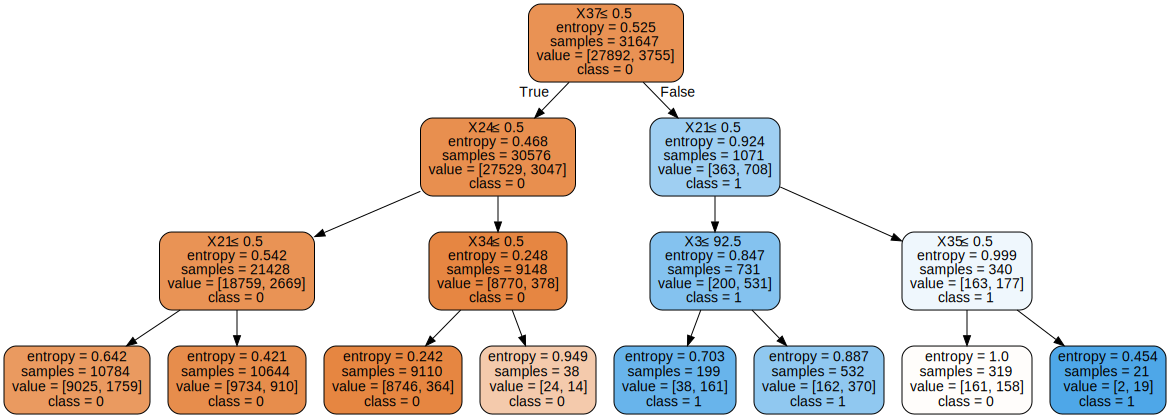

In [86]:
data = export_graphviz(clf_pruned, out_file= None, feature_names= None,class_names=['0','1'],   
                         filled=True, rounded=True, special_characters=True)

graph = Source(data)
#This shows graph without # in front of graph
graph

In [87]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'pdays', 'previous', 'poutcome', 'Target',
       'campaign_range'],
      dtype='object')

In [89]:
#This shows graph without # in front of graphviz.Source(dot_graph)
export_graphviz(clf_pruned, out_file= "tree1.dot")
graph = Source(data)
with open("tree1.dot") as f:
    dot_graph = f.read()
#graphviz.Source(dot_graph)
from graphviz import render
render('dot', 'png', 'tree1.dot') # Convert a .dot file to .png

'tree1.dot.png'

In [92]:
from sklearn import tree

In [93]:
tree.export_graphviz(clf_pruned,
                     out_file="tree2.dot",
                     feature_names = None, 
                     class_names=None,
                     filled = True)
from graphviz import render
render('dot', 'png', 'tree2.dot') # Convert a .dot file to .png

'tree2.dot.png'

In [94]:
#This shows graph without # in front of Source.from_file("tree2.dot")
# To render an existing file in a notebook
from graphviz import Source
#Source.from_file("tree2.dot")

In [95]:
#This shows graph without # in front
# Setting dpi = 300 to make image clearer than default
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
#tree.plot_tree(clf_pruned,feature_names = None, class_names=None,filled = True);

In [96]:
## Calculating feature importance FI

FI = clf_pruned.tree_.compute_feature_importances(normalize=False)

FI_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
FI_df = pd.DataFrame.from_dict(FI_dict, orient='index')
FI_df.sort_values(by=0, ascending=False)[0:20] #Top 20 features

0
education       0.003482
age             0.000000
job             0.000000
marital         0.000000
balance         0.000000
housing         0.000000
loan            0.000000
contact         0.000000
day             0.000000
month           0.000000
pdays           0.000000
previous        0.000000
poutcome        0.000000
Target          0.000000
campaign_range  0.000000

In [97]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [98]:
acc_DT = accuracy_score(y_test, preds_pruned)
recall_DT = recall_score(y_test, preds_pruned, average="binary", pos_label="yes")

In [99]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT, 'recall': recall_DT})
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

Method  accuracy    recall
0  Decision Tree  0.893689  0.134941

Overfitting is reduced after pruning, but recall has drastically reduced

In [100]:
## Apply the Random forest model and print the accuracy of Random forest Model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [101]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
recall_RF = recall_score(y_test, pred_RF, average="binary", pos_label="yes")

In [102]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF], 'recall': [recall_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf

Method  accuracy    recall
0  Decision Tree  0.893689  0.134941
0  Random Forest  0.893468  0.217080

In [103]:
## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 200, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [104]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB, pos_label='yes')

In [105]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB], 'recall':[recall_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf

Method  accuracy    recall
0  Decision Tree  0.893689  0.134941
0  Random Forest  0.893468  0.217080
0       Adaboost  0.893910  0.151890

In [106]:
## Apply Bagging Classifier Algorithm and print the accuracy


from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [107]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG, pos_label='yes')

In [108]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG], 'recall':[recall_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf

Method  accuracy    recall
0  Decision Tree  0.893689  0.134941
0  Random Forest  0.893468  0.217080
0       Adaboost  0.893910  0.151890
0        Bagging  0.893837  0.238592

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [110]:
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB, pos_label='yes')

# 7. Compare performances of all the models (5 marks)

In [111]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB], 'recall':[recall_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf

Method  accuracy    recall
0   Decision Tree  0.893689  0.134941
0   Random Forest  0.893468  0.217080
0        Adaboost  0.893910  0.151890
0         Bagging  0.893837  0.238592
0  Gradient Boost  0.894205  0.215124

Comparison of different ensemble techniques shows closer accuracy scores. 

Bagging shows best model performance in terms of recall value when compared with others, however it is still low and needs improvement.